In [28]:
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# 2. Random Sample Imputation:

* Aim : Random sample imputation consists of taking radnom observation from data set and we use this obervation to replace the NaN values

* When should it be used?

It assumes the data are missing completely at random **MCAR**



In [30]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [31]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [32]:
df['Age'].isnull().sum()

177

In [33]:
#.sample() takes any value fromt the data set

df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [34]:
df[df['Age'].isnull()].index 

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [64]:
def impute_nan(df, var, median):
  df[var+"_median"]=df[var].fillna(median)
  df[var+"_random"]=df[var]
  #it will have the random sample to fill the NaN values

  random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)

  # pandas need to have same index in order to merge the data set
  # we are setting the index to be same in the next line
  random_sample.index = df[df[var].isnull()].index 
  df.loc[df[var].isnull(), var+"_random"]=random_sample


In [65]:
median  =  df.Age.median()

In [66]:
median

28.0

In [67]:
impute_nan(df, "Age", median)

In [68]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [69]:
 import matplotlib.pyplot as plt
%matplotlib inline

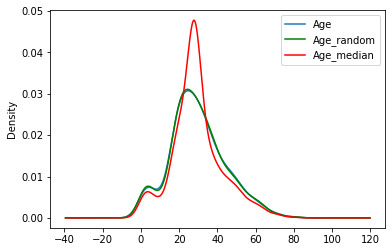

In [72]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color  ='green')
df.Age_median.plot(kind='kde',ax=ax,color  ='red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
  ##after impuation std deviation has changed or not
print(df['Age'].std())
print(df['Age_random'].std())

14.526497332334044
14.5636540895687


# **Advantages:**
1. Easy to implement
2. There is less distortion in variance

# **Disadvantages:**
3. Every situation randomness wont work (e.g. business scenario)


## **3. Capturing New values with a new feature**
It works well if the data are not missing completely at random.

In [73]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [74]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [77]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [79]:
df.Age.median()


28.0

In [81]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [83]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# **Advantages:**
1. Easy to implement
2. Captures the importance of missing values

# **Disadvantages:**
3. Creating additional features; leads to "curse of dimensionality"

## **4. End of Distribution imputation**
It works well if the data are not missing completely at random.

In [121]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


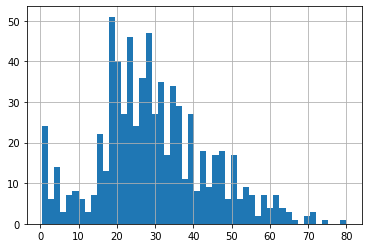

In [122]:
df.Age.hist(bins=50)

in end of dist: we take the end of dist. obtained by :mean + 3*dist 

In [123]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


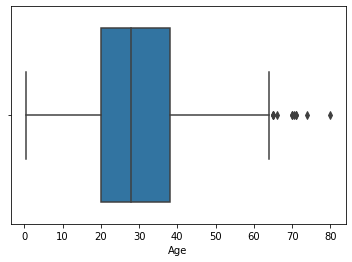

In [124]:
# to see the outliers
import seaborn as sns
sns.boxplot('Age', data = df)
#first vertical correspond to 25 percentile ( blue box)
#second vertical line correspond to 50 percentile
# 3rd to 75 perctnile
# the small vertical line on the right is 100 percentile and dots correspond to outliers

In [125]:
def impute_nan(df, variable, median, extreme):
  df[variable+"_end_dist"]=df[variable].fillna(extreme)
  df[variable].fillna(median, inplace=True)
  

In [126]:
median=df.Age.median()

In [127]:
impute_nan(df, "Age", median, extreme)
df.head(30)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


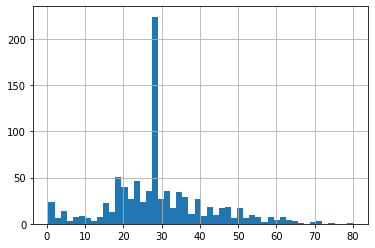

In [128]:
df['Age'].hist(bins=50)

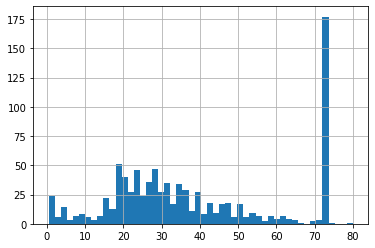

In [129]:
df['Age_end_dist'].hist(bins=50)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


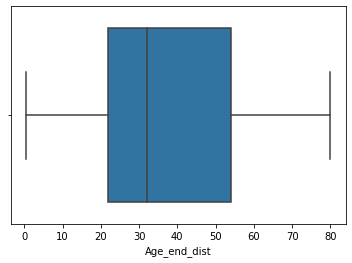

In [130]:
sns.boxplot('Age_end_dist', data=df)

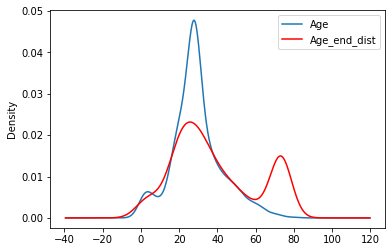

In [132]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_dist.plot(kind='kde',ax=ax,color  ='red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# **Advantages:**
1. easy to implement
2. captures the importance of missingness if there is one

# **Disadvantages:**
3. distorts the original dist. of the variable
4. if missingness is not imp. it may mask the predictive power of the original variable by distorting its dist.
5. if the number of NAN is big, it will mask true outliers in the distribution
6. if thenumber of NAN is small, the replaced NA maybe considered an outlier and pre-processed in a subsequent feature engineering